# DATA 606- Predicting D.C. Residential Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures as pf
from statsmodels.api import OLS
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("DC_Properties.csv")

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [5]:
df.shape

(158957, 49)

In [6]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [7]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [8]:
#delete certain columns
df1=df.drop(columns=['Unnamed: 0','NUM_UNITS','AYB','YR_RMDL','SALEDATE','SALE_NUM','GBA','USECODE','GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','NATIONALGRID','ASSESSMENT_SUBNBHD','CENSUS_TRACT','CENSUS_BLOCK','QUALIFIED','HEAT','STORIES'])

In [9]:
#filter source.residential
df2=df1[df1.SOURCE=='Residential']

In [10]:
#set '0' in AC column to N in training
df2.AC.replace('0', 0, inplace=True)
df2.AC.replace('Y', 1, inplace=True)
df2.AC.replace('N', 0, inplace = True)

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
df2.isnull().sum()

BATHRM                 0
HF_BATHRM              0
AC                     0
ROOMS                  0
BEDRM                  0
EYB                    0
PRICE              48796
BLDG_NUM               0
STYLE                  0
STRUCT                 0
GRADE                  0
CNDTN                  0
EXTWALL                0
ROOF                   0
INTWALL                0
KITCHENS               1
FIREPLACES             0
LANDAREA               0
SOURCE                 0
FULLADDRESS          656
CITY                 645
STATE                645
ZIPCODE                1
LATITUDE               1
LONGITUDE              1
ASSESSMENT_NBHD        1
WARD                   1
SQUARE                 0
X                    237
Y                    237
QUADRANT             237
dtype: int64

In [12]:
#try to keep price

In [13]:
df3=df2.dropna()

In [14]:
df3.isnull().sum()

BATHRM             0
HF_BATHRM          0
AC                 0
ROOMS              0
BEDRM              0
EYB                0
PRICE              0
BLDG_NUM           0
STYLE              0
STRUCT             0
GRADE              0
CNDTN              0
EXTWALL            0
ROOF               0
INTWALL            0
KITCHENS           0
FIREPLACES         0
LANDAREA           0
SOURCE             0
FULLADDRESS        0
CITY               0
STATE              0
ZIPCODE            0
LATITUDE           0
LONGITUDE          0
ASSESSMENT_NBHD    0
WARD               0
SQUARE             0
X                  0
Y                  0
QUADRANT           0
dtype: int64

In [15]:
df3["SQUARE"] = pd.to_numeric(df3["SQUARE"])

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57463 entries, 0 to 106695
Data columns (total 31 columns):
BATHRM             57463 non-null int64
HF_BATHRM          57463 non-null int64
AC                 57463 non-null int64
ROOMS              57463 non-null int64
BEDRM              57463 non-null int64
EYB                57463 non-null int64
PRICE              57463 non-null float64
BLDG_NUM           57463 non-null int64
STYLE              57463 non-null object
STRUCT             57463 non-null object
GRADE              57463 non-null object
CNDTN              57463 non-null object
EXTWALL            57463 non-null object
ROOF               57463 non-null object
INTWALL            57463 non-null object
KITCHENS           57463 non-null float64
FIREPLACES         57463 non-null int64
LANDAREA           57463 non-null int64
SOURCE             57463 non-null object
FULLADDRESS        57463 non-null object
CITY               57463 non-null object
STATE              57463 non-null ob

In [17]:
df3.shape

(57463, 31)

<function matplotlib.pyplot.show(*args, **kw)>

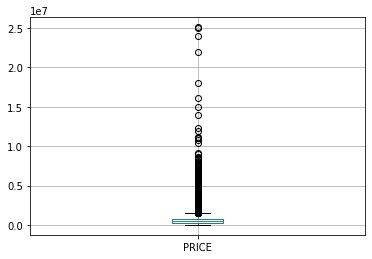

In [18]:
df3.boxplot(column=['PRICE'])
plt.show

In [19]:
#https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
lower_income, upper_income=remove_outlier(df3['PRICE'])
df3['PRICE']=np.where(df3['PRICE']>upper_income, upper_income, df3['PRICE'])
df3['PRICE']=np.where(df3['PRICE']<lower_income, lower_income, df3['PRICE'])

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


<function matplotlib.pyplot.show(*args, **kw)>

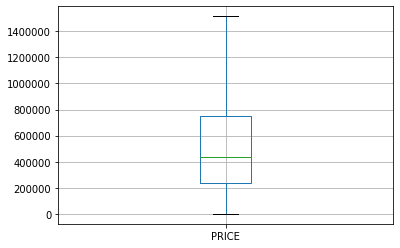

In [20]:
df3.boxplot(column=['PRICE'])
plt.show

Text(0, 0.5, 'Frequency')

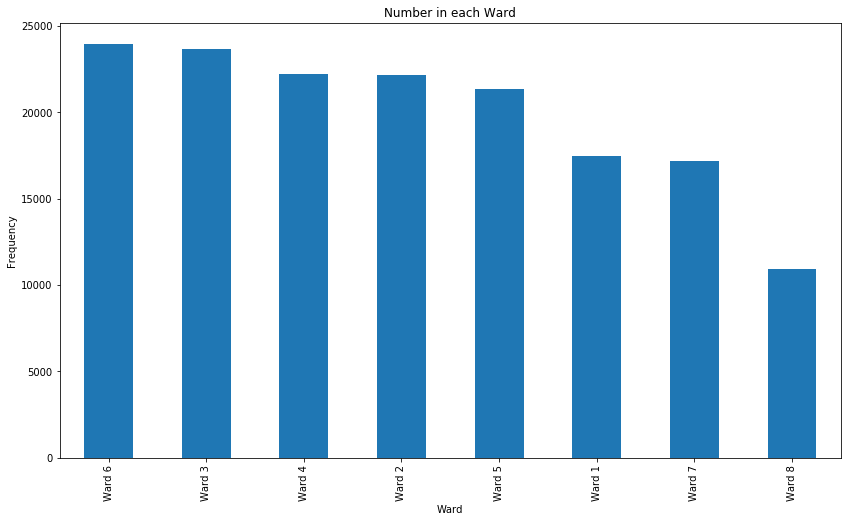

In [21]:
ax = df['WARD'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number in each Ward")
ax.set_xlabel("Ward")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

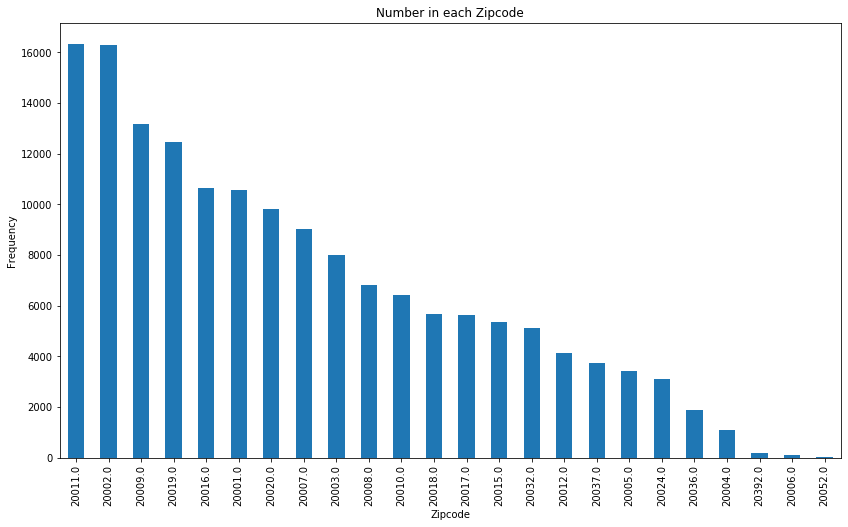

In [22]:
ax = df['ZIPCODE'].value_counts().plot(kind='bar',
                                      figsize=(14,8),
                                     title="Number in each Zipcode")
ax.set_xlabel("Zipcode")
ax.set_ylabel("Frequency")

In [23]:
df3.describe()

,BATHRM,HF_BATHRM,AC,ROOMS,BEDRM,EYB,PRICE,BLDG_NUM,KITCHENS,FIREPLACES,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,SQUARE,X,Y
count,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,5.746300e+04,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000,57463.000000
mean,2.201869,0.650175,0.728608,7.446392,3.421819,1969.774133,5.396692e+05,1.000244,1.250526,0.641404,3168.416929,20011.637488,38.915873,-77.010405,2986.336095,-77.010407,38.915892
std,1.062460,0.607430,0.444682,2.303465,1.116874,16.877890,3.823681e+05,0.015607,0.659591,0.909890,3142.403257,7.741910,0.033792,0.043168,1707.194781,0.043156,0.033794
min,0.000000,0.000000,0.000000,0.000000,0.000000,1915.000000,1.000000e+00,1.000000,0.000000,0.000000,216.000000,20001.000000,38.819731,-77.113909,14.000000,-77.113135,38.820576
25%,1.000000,0.000000,0.000000,6.000000,3.000000,1957.000000,2.400000e+05,1.000000,1.000000,0.000000,1520.000000,20003.000000,38.892967,-77.035381,1367.000000,-77.035283,38.892904
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1967.000000,4.400000e+05,1.000000,1.000000,0.000000,2212.000000,20011.000000,38.916110,-77.006516,2945.000000,-77.006487,38.916092
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1975.000000,7.500000e+05,1.000000,1.000000,1.000000,4000.000000,20018.000000,38.942291,-76.983616,4293.000000,-76.983731,38.942350
max,12.000000,11.000000,1.000000,31.000000,20.000000,2018.000000,1.515000e+06,2.000000,44.000000,13.000000,187301.000000,20052.000000,38.995435,-76.909758,6277.000000,-76.910511,38.993646


Text(0, 0.5, 'Median Price')

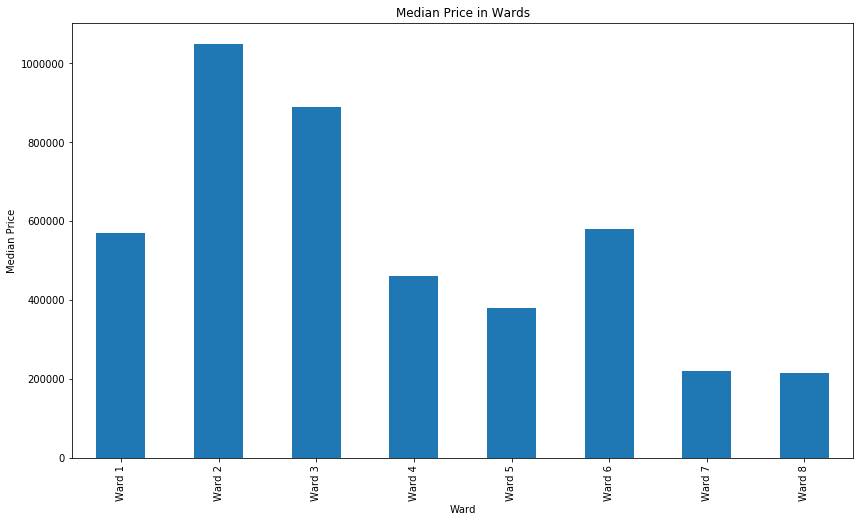

In [24]:
ax = df3.groupby(['WARD'])["PRICE"].median().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Median Price in Wards")
ax.set_xlabel("Ward")
ax.set_ylabel("Median Price")

Text(0, 0.5, 'Mean Price')

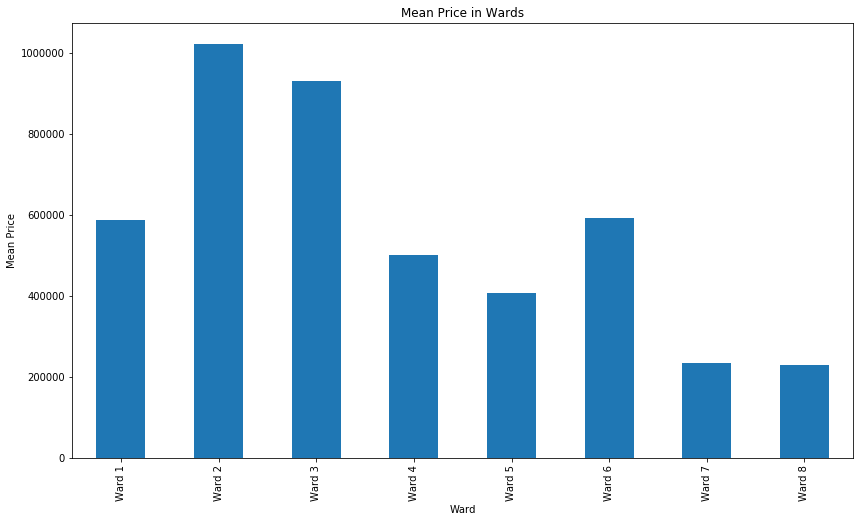

In [25]:
ax = df3.groupby(['WARD'])["PRICE"].mean().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Mean Price in Wards")
ax.set_xlabel("Ward")
ax.set_ylabel("Mean Price")

In [26]:
#https://does.dc.gov/sites/default/files/dc/sites/does/page_content/attachments/Ward_2019_BM.pdf (January 2019 data)
def unemployemnt_label (row):
   if row['WARD'] == 'Ward 1' :
      return 4.5
   if row['WARD'] == 'Ward 2' :
      return 4.2
   if row['WARD'] == 'Ward 3' :
      return 4.2
   if row['WARD'] == 'Ward 4':
      return 5.6
   if row['WARD']  == 'Ward 5':
      return 7.4
   if row['WARD'] == 'WARD 6':
      return 5.8
   if row['WARD'] == 'Ward 7':
      return 10.1
   if row['WARD'] == 'Ward 8':
      return 13
print(df3.apply (lambda row: unemployemnt_label(row), axis=1) )   
df3['unemployment_rate'] = df3.apply (lambda row: unemployemnt_label(row), axis=1)

0          4.2
2          4.2
3          4.2
5          4.2
7          4.2
          ... 
106687    13.0
106688    13.0
106692    13.0
106694    13.0
106695    13.0
Length: 57463, dtype: float64


/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
df3.isnull().sum()

BATHRM                  0
HF_BATHRM               0
AC                      0
ROOMS                   0
BEDRM                   0
EYB                     0
PRICE                   0
BLDG_NUM                0
STYLE                   0
STRUCT                  0
GRADE                   0
CNDTN                   0
EXTWALL                 0
ROOF                    0
INTWALL                 0
KITCHENS                0
FIREPLACES              0
LANDAREA                0
SOURCE                  0
FULLADDRESS             0
CITY                    0
STATE                   0
ZIPCODE                 0
LATITUDE                0
LONGITUDE               0
ASSESSMENT_NBHD         0
WARD                    0
SQUARE                  0
X                       0
Y                       0
QUADRANT                0
unemployment_rate    9590
dtype: int64

In [28]:
df3['unemployment_rate'] = df3['unemployment_rate'].fillna(df3['unemployment_rate'].mode()[0])

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df3.isnull().sum()

BATHRM               0
HF_BATHRM            0
AC                   0
ROOMS                0
BEDRM                0
EYB                  0
PRICE                0
BLDG_NUM             0
STYLE                0
STRUCT               0
GRADE                0
CNDTN                0
EXTWALL              0
ROOF                 0
INTWALL              0
KITCHENS             0
FIREPLACES           0
LANDAREA             0
SOURCE               0
FULLADDRESS          0
CITY                 0
STATE                0
ZIPCODE              0
LATITUDE             0
LONGITUDE            0
ASSESSMENT_NBHD      0
WARD                 0
SQUARE               0
X                    0
Y                    0
QUADRANT             0
unemployment_rate    0
dtype: int64

In [30]:
df3.shape

(57463, 32)

In [31]:
df4=df3.reset_index(drop=True)

In [32]:
ax = df4.groupby(['WARD'])["EYB"].median()
print(ax)

WARD
Ward 1    1967
Ward 2    1976
Ward 3    1972
Ward 4    1964
Ward 5    1964
Ward 6    1967
Ward 7    1964
Ward 8    1967
Name: EYB, dtype: int64


Text(0, 0.5, 'Median Price')

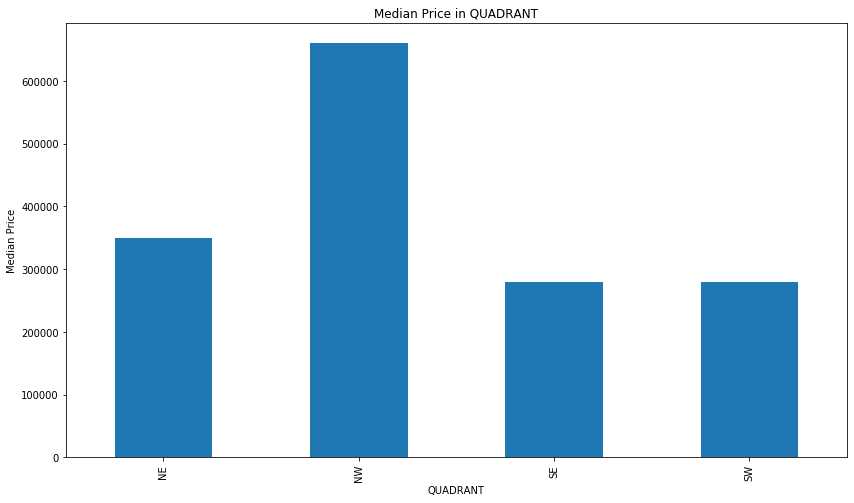

In [33]:
ax = df4.groupby(['QUADRANT'])["PRICE"].median().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Median Price in QUADRANT")
ax.set_xlabel("QUADRANT")
ax.set_ylabel("Median Price")

Text(0, 0.5, 'Median Price')

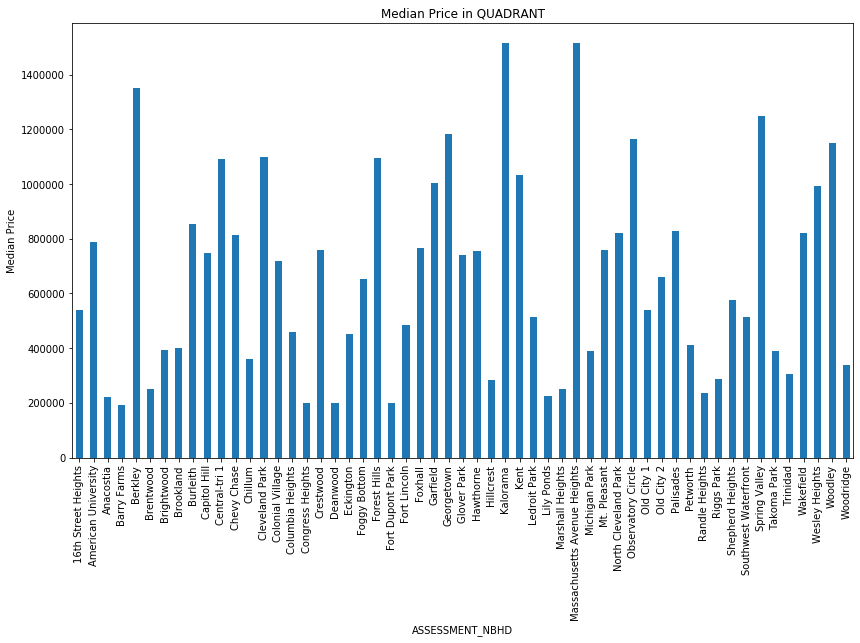

In [34]:
ax = df4.groupby(['ASSESSMENT_NBHD'])["PRICE"].median().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Median Price in QUADRANT")
ax.set_xlabel("ASSESSMENT_NBHD")
ax.set_ylabel("Median Price")

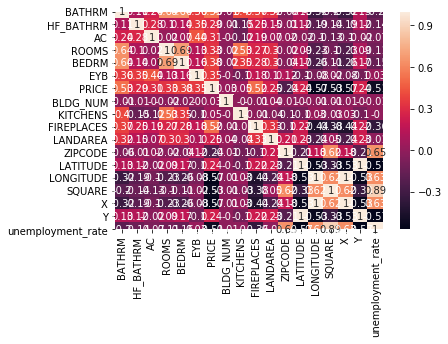

In [35]:
correlation_matrix = df4.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
df4.info()

In [52]:
df5=df4.drop(columns= ['STYLE', 'STRUCT', 'GRADE', 'EXTWALL', 'ROOF', 'INTWALL', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE','X','Y', 'BLDG_NUM','KITCHENS']) 

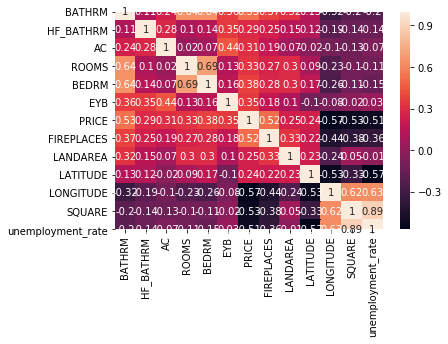

In [53]:
correlation_matrix = df5.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Phase 2

In [54]:
#Create dummy variables for Ward, Quadrant, AC, and Neighborhood 

#df4=df4.join(pd.get_dummies(df4['WARD'], drop_first=True));
df6=df5.join(pd.get_dummies(df4['QUADRANT'], drop_first=True));
#df4=df4.join(pd.get_dummies(df4['AC'], drop_first=True));
df7=df6.join(pd.get_dummies(df4['ASSESSMENT_NBHD'], drop_first=True));
#df4=df4.join(pd.get_dummies(df4['CNDTN'], drop_first=True))

In [55]:
#drop original columns

df7.drop(['SOURCE','WARD','QUADRANT','AC','CNDTN','ASSESSMENT_NBHD'], axis = 1, inplace = True)

df7.reset_index(inplace = True, drop=True)

In [56]:
#seperate the target value from independent variables

X=df7.drop(['PRICE'],axis=1)
y=df7['PRICE']


In [57]:
#setup evaluation for later phase

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [58]:
#split into Test and Train

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)

In [59]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57463 entries, 0 to 57462
Data columns (total 69 columns):
BATHRM                          57463 non-null int64
HF_BATHRM                       57463 non-null int64
ROOMS                           57463 non-null int64
BEDRM                           57463 non-null int64
EYB                             57463 non-null int64
PRICE                           57463 non-null float64
FIREPLACES                      57463 non-null int64
LANDAREA                        57463 non-null int64
LATITUDE                        57463 non-null float64
LONGITUDE                       57463 non-null float64
SQUARE                          57463 non-null int64
unemployment_rate               57463 non-null float64
NW                              57463 non-null uint8
SE                              57463 non-null uint8
SW                              57463 non-null uint8
American University             57463 non-null uint8
Anacostia                       574

In [60]:
df4.head()

,BATHRM,HF_BATHRM,AC,ROOMS,BEDRM,EYB,PRICE,BLDG_NUM,STYLE,STRUCT,...,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,WARD,SQUARE,X,Y,QUADRANT,unemployment_rate
0,4,0,1,8,4,1972,1095000.0,1,3 Story,Row Inside,...,20009.0,38.914680,-77.040832,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2
1,3,1,1,9,5,1984,1515000.0,1,3 Story,Row Inside,...,20009.0,38.914684,-77.040678,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2
2,3,1,1,8,5,1984,1515000.0,1,3 Story,Row Inside,...,20009.0,38.914683,-77.040629,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2
3,3,2,1,10,5,1972,1515000.0,1,4 Story,Row Inside,...,20009.0,38.914331,-77.039715,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2
4,3,1,1,8,4,1972,1050000.0,1,3 Story,Row Inside,...,20009.0,38.915408,-77.040129,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2


In [61]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler  
st_x= StandardScaler()  

X_train= st_x.fit_transform(X_train)  

X_test= st_x.transform(X_test)  

Linear regression OLS model:

In [62]:
#model = sm.OLS(y_train, X_train.astype(float)).fit()

In [63]:
#model.summary()

In [64]:
#from sklearn import metrics 

#evaluate(model, X_test, y_test)


In [65]:
#df4.shape

Decision Tree Regressor:

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics 
#regressor = DecisionTreeRegressor(max_depth=15)
param_dist = {'max_depth': [1,20]}
#regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
DTR = DecisionTreeRegressor()
DTR_cv = RandomizedSearchCV(DTR, param_dist)
DTR_cv.fit(X_train, y_train)
evaluate(DTR_cv.best_estimator_, X_test, y_test)
y_predicted = DTR_cv.predict(X_test);
r2 = r2_score(y_test,y_predicted )
print ("The R2 score is {}".format(r2))

/Users/dominiquebrown/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Model Performance
Mean_Absolute_Error: 195557.75505056302
Mean_Squared_Error: 81184875674.11699
RMSE: 284929.597750246
The R2 score is 0.4431869976086489


In [67]:

#fig = plt.figure(figsize=(25,20))
#_ = .plot_tree(DTR_cv, feature_names=df4.feature_names, filled=True)#

In [68]:
from sklearn.model_selection import cross_val_score


#score = cross_val_score(regressor, X_test, y_test)
score = DTR_cv.score(X_test, y_test)

print (score) 

0.4431869976086489


Linear Regression:

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 235657.97393893905
R2 score is 0.6203920678417284


The model performance for testing set
--------------------------------------
RMSE is 234563.821849916
R2 score is 0.6226396235208154


Random Forrest Regressor:

In [71]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 25)
# Train the model on training data
pred = rf.fit(X_train,y_train).predict(X_test)

RMSE_1 = np.sqrt(mean_squared_error(y_test, pred))

print("The Root Mean Squared Error of Random Forest Regression is ",RMSE_1)

print("The R2 value of Random Forest Regression is ",r2_score(y_test,pred))

The Root Mean Squared Error of Random Forest Regression is  220518.67091993307
The R2 value of Random Forest Regression is  0.6664776280330991


In [72]:
rf.feature_importances_

array([7.34076969e-02, 1.39476849e-02, 2.56799083e-02, 2.25735981e-02,
       1.66468603e-01, 1.52222752e-02, 7.02054180e-02, 6.76067454e-02,
       3.56206438e-01, 1.63214766e-01, 3.57402009e-03, 1.56951869e-04,
       5.32373846e-04, 5.32310447e-04, 4.84882569e-04, 2.12879248e-04,
       1.52427958e-04, 2.87634507e-04, 2.04279728e-04, 2.66325729e-04,
       5.47639017e-04, 2.25085985e-04, 2.74492760e-03, 2.23655329e-04,
       4.36716088e-04, 9.55922123e-05, 8.78814993e-04, 3.62674671e-05,
       4.11113681e-04, 4.36788208e-05, 1.53488451e-04, 4.47890067e-05,
       3.12388010e-04, 1.12635266e-04, 5.02406960e-04, 6.40141558e-05,
       1.76546182e-05, 1.20596988e-04, 4.18422929e-04, 1.53356990e-03,
       1.96020591e-04, 1.25975317e-04, 4.89159606e-04, 4.67801059e-04,
       4.18116408e-04, 5.00847318e-04, 2.24572798e-05, 1.12362693e-04,
       1.70134877e-04, 8.03985250e-05, 1.86253796e-04, 4.79206353e-04,
       3.17828137e-04, 5.28085737e-04, 3.72751000e-04, 4.28365544e-04,
      

In [73]:
print(len(X.columns), len(rf.feature_importances_))

68 68


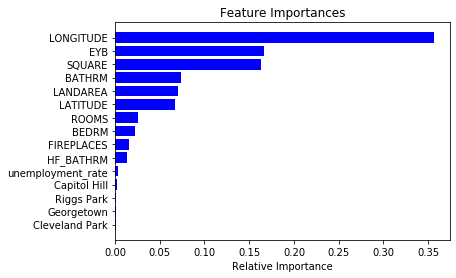

In [74]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

# customized number 
num_features = 15


plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

Part 2

In [75]:
#create a dataframe with features from DF4 dataframe
features = ['LONGITUDE', 'LATITUDE', 'PRICE']
select_df = df4[features]
select_df.columns

Index(['LONGITUDE', 'LATITUDE', 'PRICE'], dtype='object')

In [76]:
#scale the features 
X = StandardScaler().fit_transform(select_df)

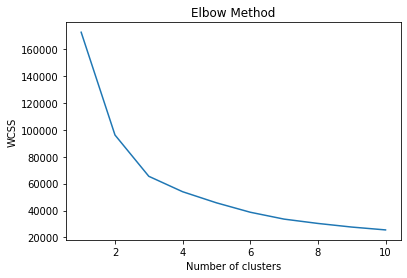

In [77]:
#KMeans Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
#Perform KMeans model
kmeans = KMeans(n_clusters=3) # number of clusters must be specified
model = kmeans.fit(X)

In [79]:
# Create cluster label
df4['price_region'] = kmeans.fit_predict(X)
df4['price_region'] = df4['price_region'].astype("category")
df4.head()

,BATHRM,HF_BATHRM,AC,ROOMS,BEDRM,EYB,PRICE,BLDG_NUM,STYLE,STRUCT,...,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,WARD,SQUARE,X,Y,QUADRANT,unemployment_rate,price_region
0,4,0,1,8,4,1972,1095000.0,1,3 Story,Row Inside,...,38.914680,-77.040832,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2,1
1,3,1,1,9,5,1984,1515000.0,1,3 Story,Row Inside,...,38.914684,-77.040678,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2,1
2,3,1,1,8,5,1984,1515000.0,1,3 Story,Row Inside,...,38.914683,-77.040629,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2,1
3,3,2,1,10,5,1972,1515000.0,1,4 Story,Row Inside,...,38.914331,-77.039715,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2,1
4,3,1,1,8,4,1972,1050000.0,1,3 Story,Row Inside,...,38.915408,-77.040129,Old City 2,Ward 2,152,-77.040429,38.914881,NW,4.2,1


TypeError: data type not understood

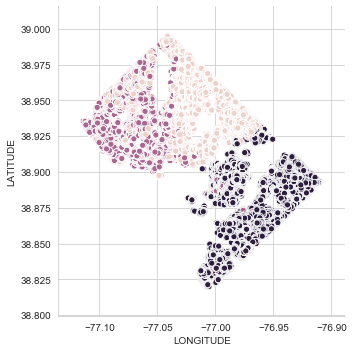

In [80]:
#create plot (there is an datatype error I am working on but it still works)
sns.set_style('whitegrid')
sns.relplot(x='LONGITUDE', y='LATITUDE',hue= 'price_region', data=df4, kind='scatter');

No handles with labels found to put in legend.


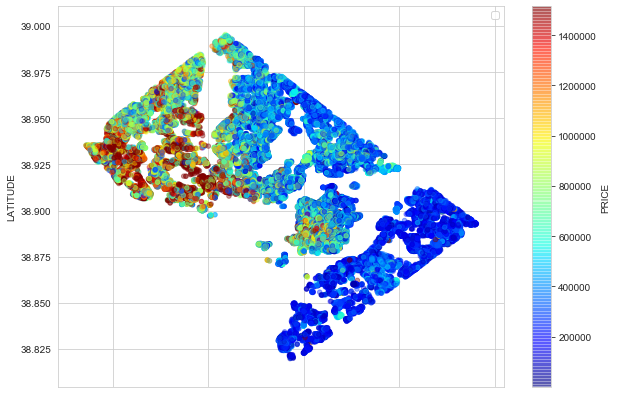

In [82]:
#Map that shows price range in DC

df4.plot(kind="scatter", x='LONGITUDE', y='LATITUDE',
    c="PRICE", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7))
plt.legend()

plt.show()

In [83]:
features = ['PRICE', 'EYB']
select_df2 = df4[features]
select_df2.columns
X = StandardScaler().fit_transform(select_df2)   

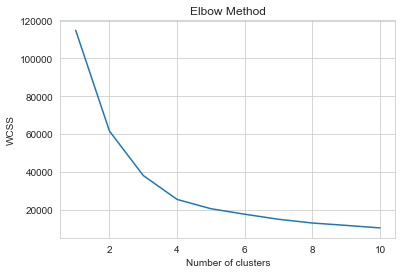

In [84]:
#KMeans Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
#Perform KMeans model
kmeans = KMeans(n_clusters=3) # number of clusters must be specified

df4['price_eyb'] = kmeans.fit_predict(X)
df4['price_eyb'] = df4['price_eyb'].astype("category")

TypeError: data type not understood

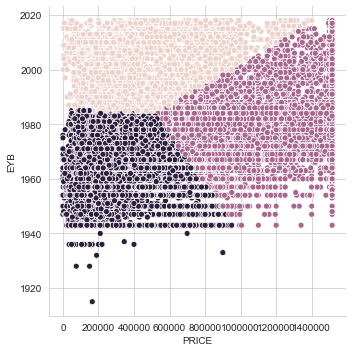

In [87]:
sns.set_style('whitegrid')
sns.relplot(x='PRICE', y='EYB',hue= 'price_eyb', data=df4, kind='scatter');

In [88]:
features = ['PRICE', 'SQUARE']
select_df2 = df4[features]
select_df2.columns
X = StandardScaler().fit_transform(select_df2) 

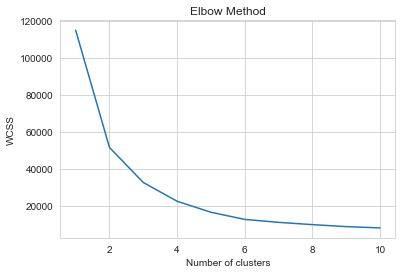

In [89]:
#KMeans Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
#Perform KMeans model
kmeans = KMeans(n_clusters=2) # number of clusters must be specified

df4['price_square'] = kmeans.fit_predict(X)
df4['price_square'] = df4['price_land'].astype("category")

TypeError: data type not understood

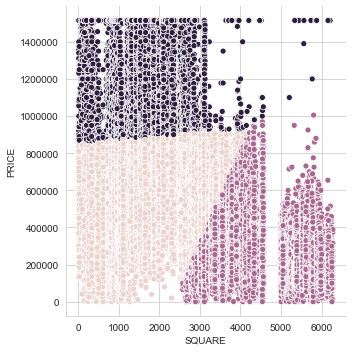

In [96]:
sns.set_style('whitegrid')
sns.relplot(x='SQUARE', y='PRICE',hue= 'price_land', data=df4, kind='scatter');